# Interpretation of Compression Models

**Created by Gregory Way 2018**
**Modified by Zoe Plumridge and Chioma Opara 2024 for GREIN files**

Visualizing results of `Tybalt` and `ADAGE` parameter sweeps over z dimensions across `GREIN` gene expression data.

First, to summarize the parameter sweep into a single file run:

```bash
bash scripts/summarize_sweep.sh
```
`Tybalt` and `ADAGE` are variational autoencoders. 

## Structure:

The notebook is ordered first by species, and then by algorithm. The first section is for humans, then mice, then humans and mice combined. Within each species or pair of species, `Tybalt` comes first, followed by `ADAGE`.

## Output:

Several figures describing the results of a parameter sweep over latent space dimensionality for both Tybalt and ADAGE models in each dataset.

## Interactions with other files:
scripts are for summarizing and machine learning 

In [7]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(cowplot))

In [8]:
set.seed(123)

In [9]:
`%>%` <- dplyr::`%>%`

## Load Functions and Constants

In [10]:
source(file.path('scripts', 'viz_utils.R'))

In [11]:
# Set input file names and output directories
# tcga_adage_file <- file.path("results", "param_sweep_adage_TCGA_full-results.tsv")
# tcga_tybalt_file <- file.path("results", "param_sweep_tybalt_TCGA_full-results.tsv")
# tcga_fig_dir <- file.path("figures", "tcga_results")

# gtex_adage_file <- file.path("results", "param_sweep_adage_GTEX_full-results.tsv")
# gtex_tybalt_file <- file.path("results", "param_sweep_tybalt_GTEX_full-results.tsv")
# gtex_fig_dir <- file.path("figures", "gtex_results")

# target_adage_file <- file.path("results", "param_sweep_adage_TARGET_full-results.tsv")
# target_tybalt_file <- file.path("results", "param_sweep_tybalt_TARGET_full-results.tsv")
# target_fig_dir <- file.path("figures", "target_results")

# grein_adage_file <- file.path("results", "param_sweep_adage_GREIN_full-results.tsv")
# grein_tybalt_file <- file.path("results", "param_sweep_tybalt_GREIN_full-results.tsv")
# grein_fig_dir <- file.path("figures", "grein_results")

grein_adage_file_human <- file.path("results", "param_sweep_adage_GREIN_full-results_human.tsv")
grein_tybalt_file_human <- file.path("results", "param_sweep_tybalt_GREIN_full-results_human.tsv")
grein_fig_dir_human <- file.path("figures", "grein_results_human")


## Part IA: GREIN - Human - Tybalt

In [12]:
# Load and Process Data
grein_tybalt_human <- processParamSweepResults(param_file = grein_tybalt_file_human,
                                        dataset = "GREIN",
                                        algorithm = "Tybalt",
                                        output_fig_dir = grein_fig_dir_human)

Warning message:
“The following named parsers don't match the column names: train_epoch, loss, val_loss”


ERROR: Error in loadNamespace(x): there is no package called ‘reshape2’


### 1) Final Validation Loss (TCGA, Tybalt)

Describe final validation loss for all hyperparameter combinations across the number of latent space dimensionality (x axis).

In [13]:
grein_tybalt_human$final_val_plot + theme(text = element_text(size = 15))

ERROR: Error in eval(expr, envir, enclos): object 'grein_tybalt_human' not found


### 2) More Detail of Single Training Curve (TCGA, Tybalt)

Plot more detail of a single `learning rate` and `batch size` combination across all learning `epochs`.

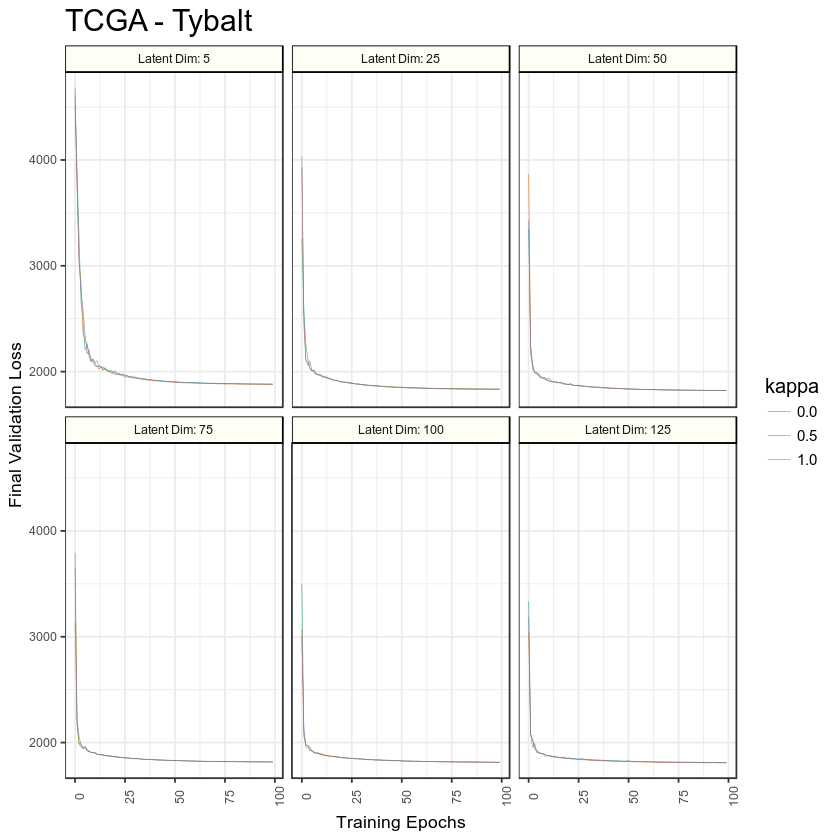

In [8]:
tcga_tybalt$one_model_plot + theme(text = element_text(size = 15))

### 3) Determine Optimal Hyperparameters (TCGA, Tybalt)

Extract the optimal hyperparameters for each dimensionality.

In [9]:
tcga_tybalt$all_results$best_params

learning_rate,batch_size,epochs,kappa,num_components,end_loss
Learn: 0.002,Batch: 50,100,0.0,5,1870.364
Learn: 0.001,Batch: 50,100,0.0,25,1828.377
Learn: 0.001,Batch: 50,100,1.0,50,1818.103
Learn: 0.0015,Batch: 50,100,0.5,75,1814.484
Learn: 0.001,Batch: 50,100,0.0,100,1811.368
Learn: 0.0005,Batch: 50,100,0.5,125,1807.844


### 4) Interpretation of Results and Subsetting Parameters

Subset `TCGA` `Tybalt` to a single model with stable hyperparameters.
These parameters will be used in downstream applications sweeping over latent space dimensionality.

We observed that increasing the number of components resulted in changes to optimal hyperparameters.
As the dimensionality increased, the `learning rate` decreased.
However, the `batch size` and `epochs` remained constant.
Also, `kappa` did not seem to impact performance.
For simplicity, alter the `learning rate` for the model, but maintain consistency for other parameters.

In [10]:
tcga_tybalt_good_training_df <- tcga_tybalt$all_results$melt_df %>%
  dplyr::filter(batch_size == 50,
                epochs == 100,
                kappa == "0.0") %>%
  dplyr::filter(
    (learning_rate == "0.002" & num_components == 5) |
      (learning_rate == "0.0015" & num_components == 25) |
      (learning_rate == "0.0015" & num_components == 50) |
      (learning_rate == "0.0015" & num_components == 75) |
      (learning_rate == "0.001" & num_components == 100) |
      (learning_rate == "0.0005" & num_components == 125)
  ) %>%
  dplyr::mutate(
      num_components =
          factor(num_components,
                 levels = sort(as.numeric(paste(unique(num_components)))))
  )

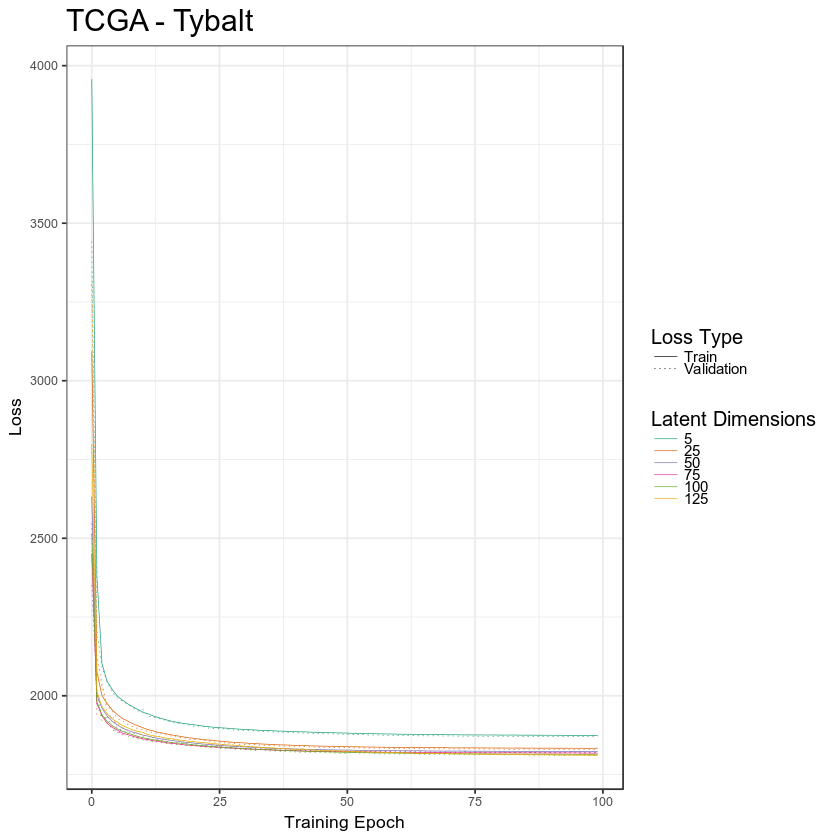

In [11]:
plotBestModel(tcga_tybalt_good_training_df,
              dataset = "TCGA",
              algorithm = "Tybalt",
              output_fig_dir = tcga_fig_dir) + theme(text = element_text(size = 15))

## Part IB: The Cancer Genome Atlas - ADAGE

In [12]:
# Load and Process Data
tcga_adage <- processParamSweepResults(param_file = tcga_adage_file,
                                       dataset = "TCGA",
                                       algorithm = "ADAGE",
                                       output_fig_dir = tcga_fig_dir)

### 1) Final Validation Loss (TCGA, ADAGE)

Describe final validation loss for all hyperparameter combinations across the number of latent space dimensionality (x axis).

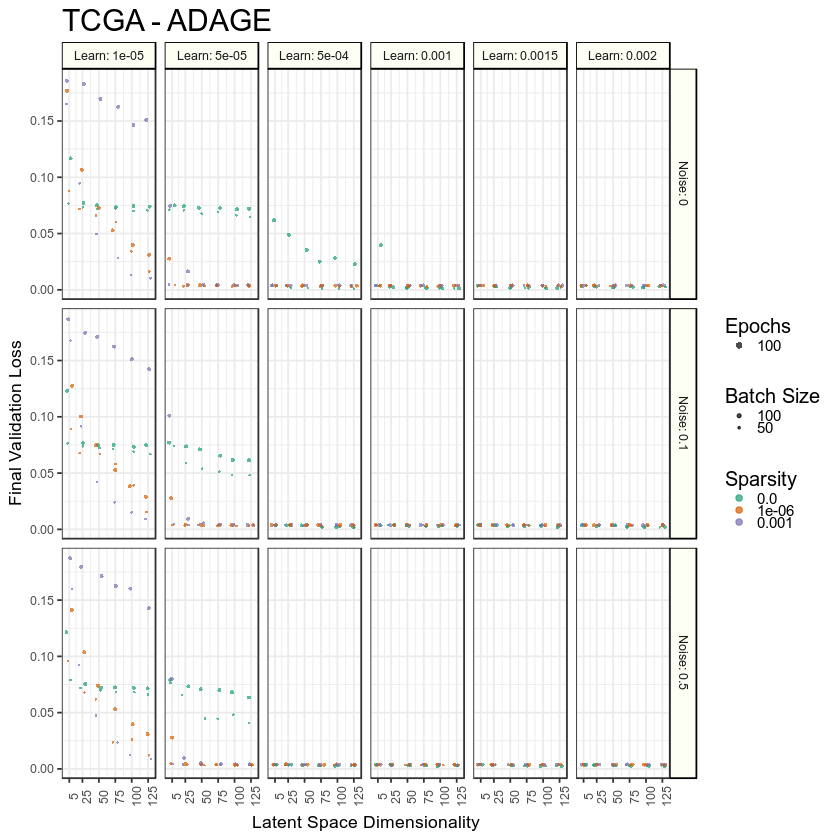

In [13]:
tcga_adage$final_val_plot + theme(text = element_text(size = 15))

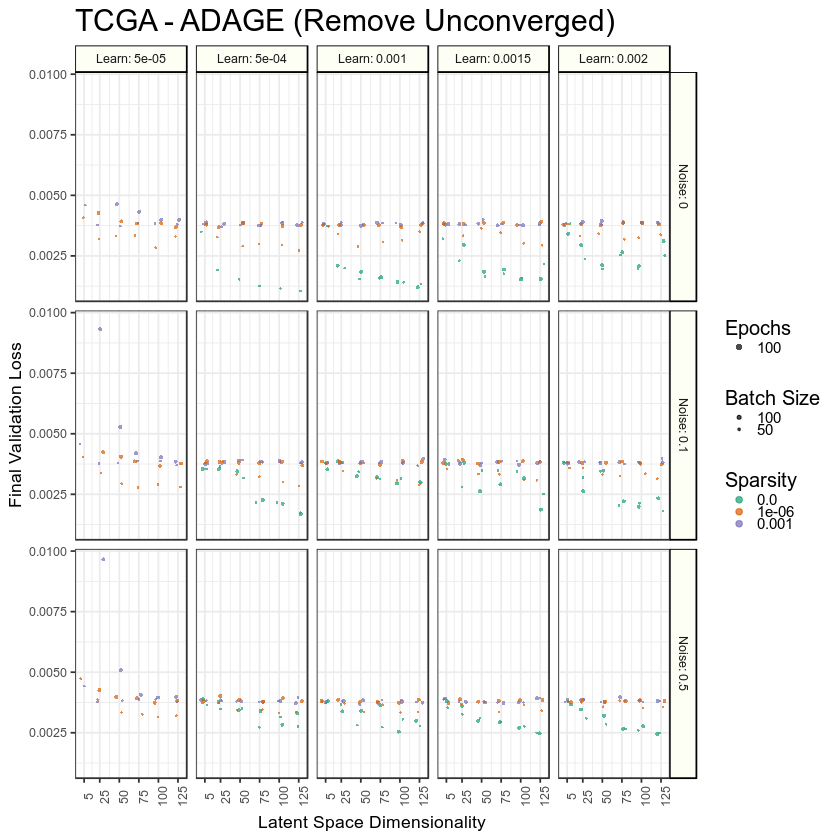

In [14]:
# Several hyperparameter combinations did not converge
# This was particularly a result of the low learning rates - filter and replot
tcga_adage_converge_df <- tcga_adage$all_results$select_df %>%
    dplyr::filter(end_loss < 0.01, learning_rate != 'Learn: 1e-05')

# Replot and Save Update
tcga_adage_converge <- (
    plotFinalLoss(tcga_adage_converge_df,
                  dataset = "TCGA",
                  algorithm = "ADAGE",
                  output_fig_dir = tcga_fig_dir,
                  plot_converge = TRUE)
    )

tcga_adage_converge + theme(text = element_text(size = 15))

### 2) More Detail of Single Training Curve (TCGA, ADAGE)

Plot more detail of a single `learning rate`, `batch size`, and `sparsity` combination.

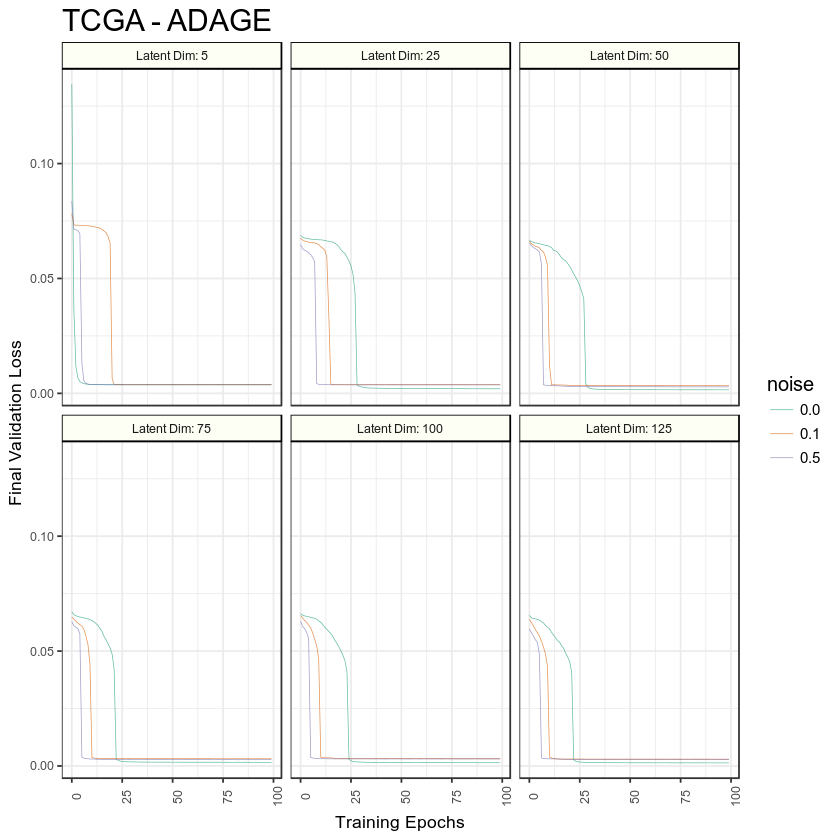

In [15]:
tcga_adage$one_model_plot + theme(text = element_text(size = 15))

### 3) Determine Optimal Hyperparameters (TCGA, ADAGE)

Extract the optimal hyperparameters for each dimensionality.

In [16]:
tcga_adage$all_results$best_params

learning_rate,batch_size,epochs,noise,sparsity,num_components,end_loss
Learn: 0.0015,50,100,Noise: 0,0.0,5,0.003209832
Learn: 5e-04,50,100,Noise: 0,0.0,25,0.001924451
Learn: 5e-04,50,100,Noise: 0,0.0,50,0.001533053
Learn: 5e-04,50,100,Noise: 0,0.0,75,0.001255852
Learn: 5e-04,50,100,Noise: 0,0.0,100,0.001153771
Learn: 5e-04,50,100,Noise: 0,0.0,125,0.001054904


### 4) Interpretation of Results and Subsetting Parameters

Subset `TCGA` `ADAGE` to single model with stable hyperparameters.
These parameters will be used in downstream applications sweeping over latent space dimensionality.

We observed that increasing the number of components resulted in changes to optimal hyperparameters.
As the dimensionaly increased, the `learning rate`, `batch size`, `epochs` and `sparsity` remained relatively consistent. However, the `noise` and `sparsity` added displayed reduced performance across dimensionality.

In [17]:
tcga_adage_good_training_df <- tcga_adage$all_results$melt_df %>%
  dplyr::filter(sparsity == "0.0",
                epochs == 100,
                batch_size == 50,
                noise == "0.0") %>%
  dplyr::filter(
    (num_components == 5 & learning_rate == "0.0015") |
      (num_components == 25 & learning_rate == "0.0015") |
      (num_components == 50 & learning_rate == "0.0005") |
      (num_components == 75 & learning_rate == "0.0005") |
      (num_components == 100 & learning_rate == "0.0005") |
      (num_components == 125 & learning_rate == "0.0005")
  ) %>%
  dplyr::mutate(
      num_components =
          factor(num_components,
                 levels = sort(as.numeric(paste(unique(num_components)))))
  )

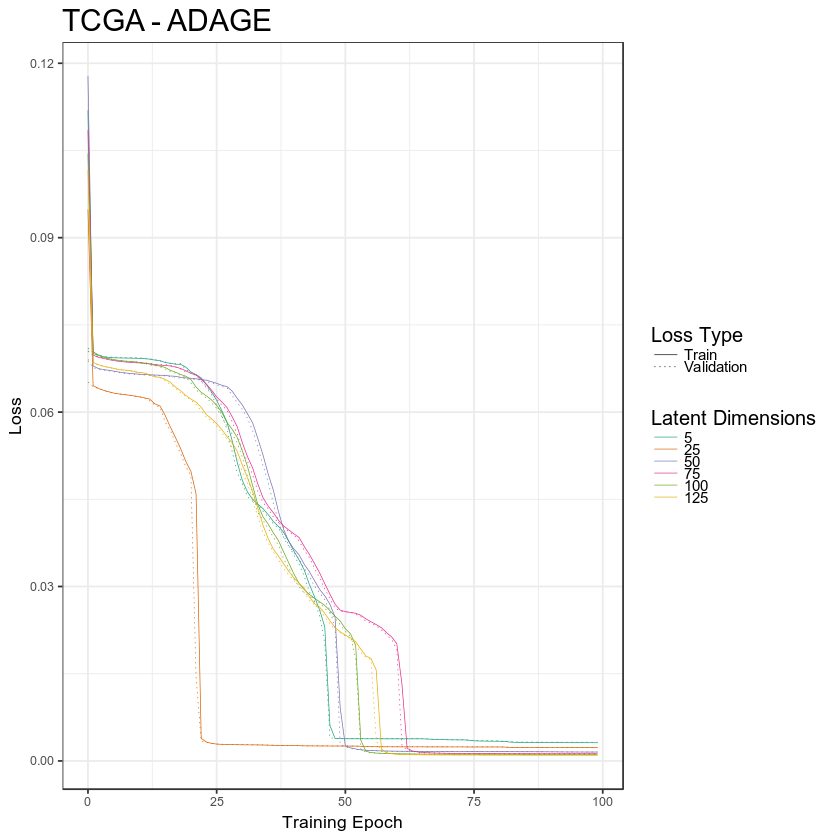

In [18]:
plotBestModel(tcga_adage_good_training_df,
              dataset = "TCGA",
              algorithm = "ADAGE",
              output_fig_dir = tcga_fig_dir) + theme(text = element_text(size = 15))

In [44]:
# adage_unconverge_label <- cowplot::ggdraw() + cowplot::draw_label(label = 'DAE (all params)',
#                                                                   hjust = 0.7, vjust = 0.4)
# adage_label <- cowplot::ggdraw() + cowplot::draw_label(label = 'DAE ', hjust = 1, vjust = 0.4)
# tybalt_label <- cowplot::ggdraw() + cowplot::draw_label(label = 'VAE', hjust = 1, vjust = 0.4)
# gtex_label <- cowplot::ggdraw() + cowplot::draw_label(label = 'GTEX', angle = 90, hjust = 0.8, vjust = 0)
# tcga_label <- cowplot::ggdraw() + cowplot::draw_label(label = 'TCGA', angle = 90, hjust = 0.8, vjust = 0)
# target_label <- cowplot::ggdraw() + cowplot::draw_label(label = 'TARGET', angle = 90, hjust = 0.5, vjust = 16)

# alg_main <- cowplot::plot_grid(adage_unconverge_label, adage_label, tybalt_label, ncol = 3)
# dataset_main <- cowplot::plot_grid(gtex_label, tcga_label, cowplot::ggdraw(), nrow = 3)

# main_plot <- (
#     cowplot::plot_grid(
#         gtex_adage$final_val_plot + ggtitle('') + xlab('') +
#             theme(plot.margin = margin(t = 0, r = 0, b = 0, l = 0)),
#         gtex_adage_converge + ggtitle('') + xlab('') + ylab('') +
#             theme(plot.margin = margin(t = 0, r = 0, b = 0, l = 0)),
#         gtex_tybalt$final_val_plot + ggtitle('') + ylab('') + xlab('') +
#             theme(plot.margin = margin(t = 0, r = 0, b = 0, l = 0)),
#         tcga_adage$final_val_plot + ggtitle('') +
#             theme(plot.margin = margin(t = 0, r = 0, b = 0, l = 0)),
#         tcga_adage_converge + ggtitle('') + xlab('') + ylab('') +
#             theme(plot.margin = margin(t = 0, r = 0, b = 0, l = 0)),
#         tcga_tybalt$final_val_plot + ggtitle('') + ylab('') + xlab('') +
#             theme(plot.margin = margin(t = 0, r = 0, b = 0, l = 0)),
#         target_label,
#         target_adage$final_val_plot + ggtitle('') +
#             theme(plot.margin = margin(t = 0, r = 0, b = 0, l = 0)),
#         target_tybalt$final_val_plot + ggtitle('') + ylab('') +
#             theme(plot.margin = margin(t = 0, r = 0, b = 0, l = 0)),
#         labels = c("a", "b", "c", "d", "e", "f", "", "g", "h"),
#         ncol = 3,
#         nrow = 3
#     )
# )

In [45]:
main_with_alg <- cowplot::plot_grid(alg_main, main_plot, nrow = 2,
                                    rel_heights = c(0.04, 1))

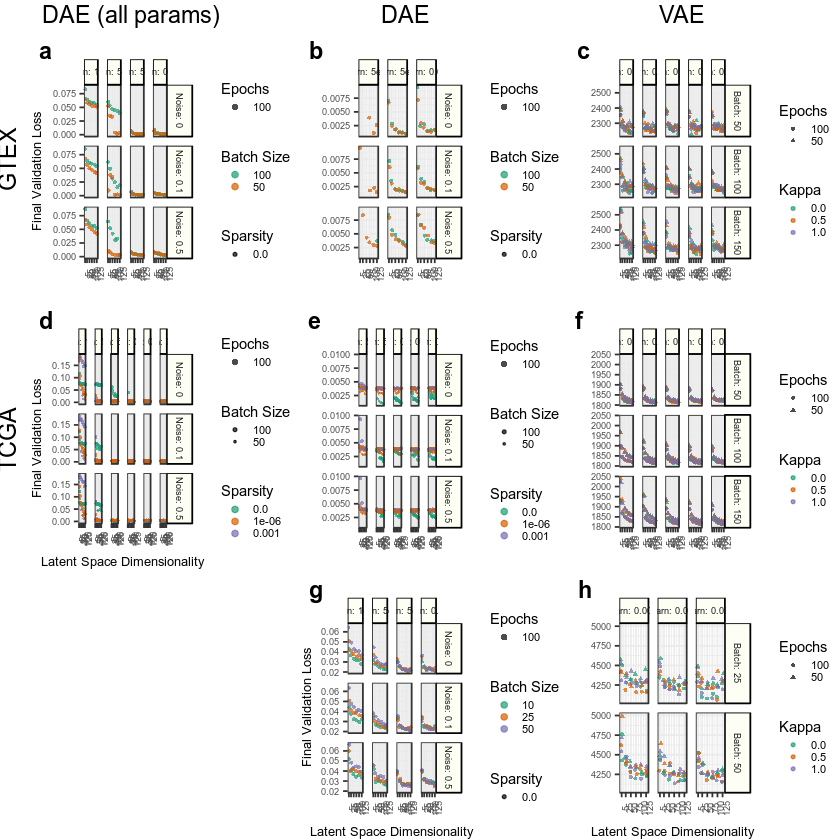

In [46]:
full_plot <- cowplot::plot_grid(dataset_main, main_with_alg, rel_widths = c(0.04, 1))
full_plot

In [47]:
for(extension in c('.png', '.pdf')) {
    sup_file <- paste0("z_dimension_sweep_summary", extension)
    sup_file <- file.path("figures", sup_file)
    cowplot::save_plot(filename = sup_file,
                       plot = full_plot,
                       base_height = 9.5,
                       base_width = 16.5)
}